In [68]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt     
%matplotlib inline
from scipy.stats import iqr

In [69]:
salary_df = pd.read_csv('salary.csv')

In [70]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [71]:
salary_df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [72]:
salary_df = salary_df.dropna(how='any',axis=0) 

In [73]:
salary_df.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [74]:
display(salary_df['salary'].min())
display(salary_df['salary'].max())

29000.0

96156.0

In [75]:
salary_df['salary'].mean()

50863.22009783626

In [76]:
salary_df['salary'].sem()

560.0622753925232

In [77]:
np.std(salary_df['yearsworked'])

9.437828327328845

In [78]:
salary_df['salary'].median()

50096.0

In [79]:
iqr(salary_df['salary'])

20345.0

In [80]:
salary_df['male'].value_counts()

1    385
0    128
Name: male, dtype: int64

In [84]:
salary_df.groupby(['position', 'male']).size()

position  male
1         0        60
          1        83
2         0        49
          1       111
3         0        19
          1       191
dtype: int64

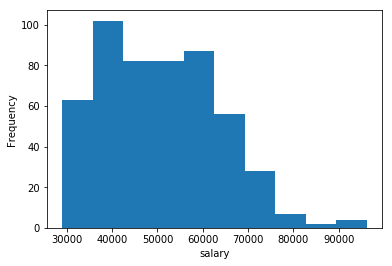

In [94]:
salary_df['salary'].plot(kind='hist')
plt.xlabel('salary')
plt.show()